#Tarea # 2

Estudiante: Jonathan Andrés Díaz Morales

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [ ]:
#--- Cargamos los datos contenidos en el dataset

import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Reto Empresarial - Computer Vision/Cars93.csv')

In [ ]:
#--- Observamos la cabecera del dataset

data.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [ ]:
#--- Seleccionamos algunas features y el objetivo

keys = ['Manufacturer', 'Model', 'Type', 'Min.Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make']
y = ['Price']

Hacemos una copia del dataframe para manipular sus entradas y convertir datos tipo object a tipo entero.

In [ ]:
data_copy=data.copy()

##Dataframe unicamente con datos númericos

In [ ]:
#type=np.unique(data_copy['Manufacturer'])
#number=np.arange(len(type))
#data_copy['Manufacturer']=data_copy['Manufacturer'].replace(type, number)

columns_object=data_copy.dtypes[data.dtypes==object].index
for i in columns_object:
  type=np.unique(data_copy[i])
  number=np.arange(len(type))
  data_copy[i]=data_copy[i].replace(type, number)

data_copy.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,0,48,3,12.9,15.9,18.8,25,31,2,1,1,1.8,140,6300,2890,1,13.2,5,177,102,68,37,26.5,11.0,2705,1,0
1,2,0,55,2,29.2,33.9,38.7,18,25,0,1,3,3.2,200,5500,2335,1,18.0,5,195,115,71,38,30.0,15.0,3560,1,1
2,3,1,8,0,25.9,29.1,32.3,20,26,1,1,3,2.8,172,5500,2280,1,16.9,5,180,102,67,37,28.0,14.0,3375,1,3
3,4,1,0,2,30.8,37.7,44.6,19,26,0,1,3,2.8,172,5500,2535,1,21.1,6,193,106,70,37,31.0,17.0,3405,1,2
4,5,2,5,2,23.7,30.0,36.2,22,30,1,2,1,3.5,208,5700,2545,1,21.1,4,186,109,69,39,27.0,13.0,3640,1,4


##Clasificación Visual

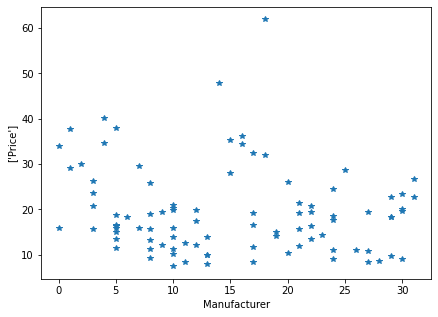

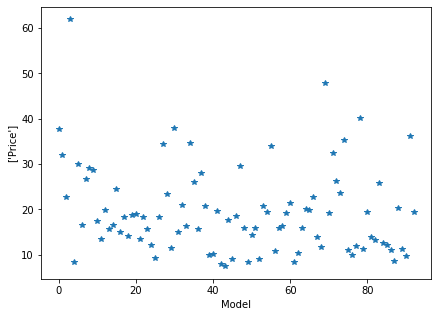

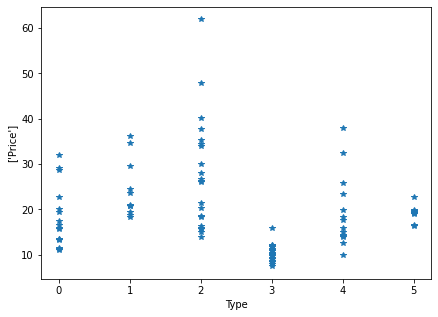

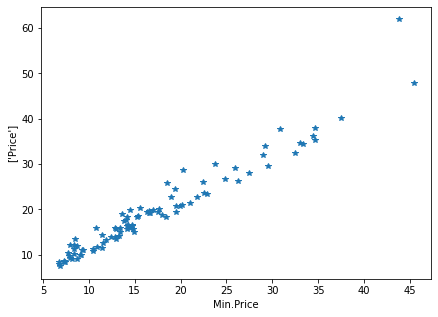

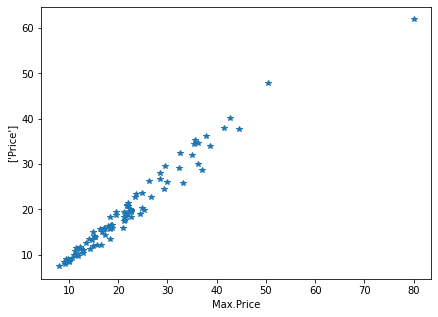

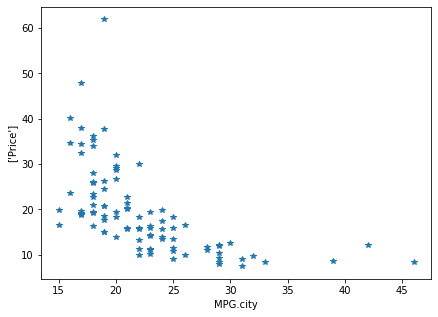

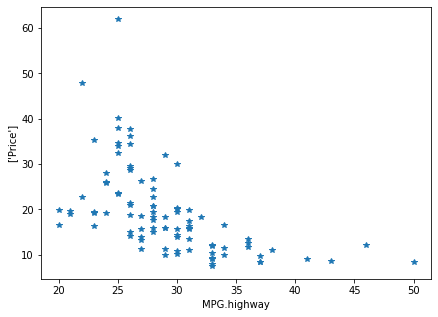

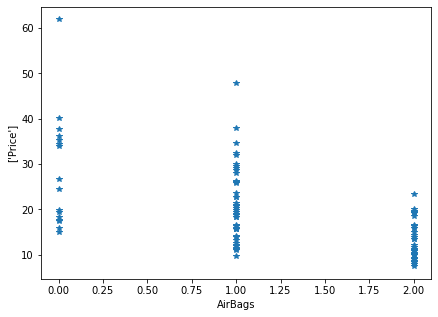

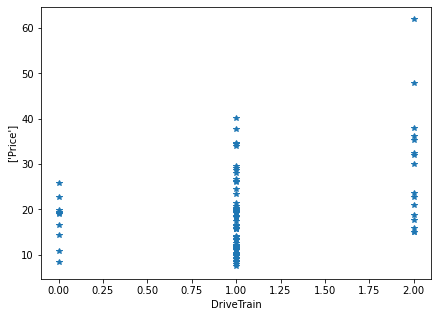

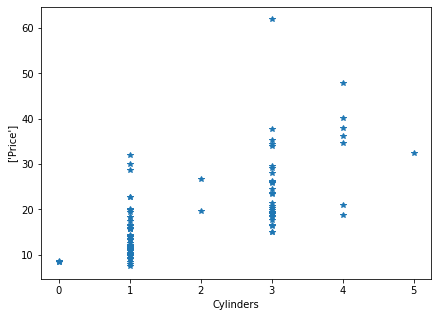

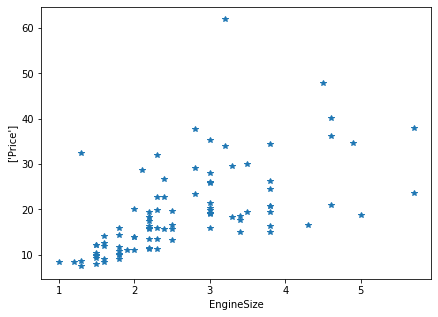

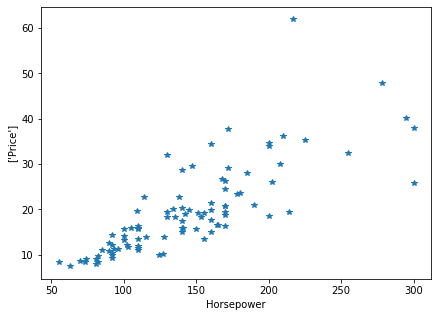

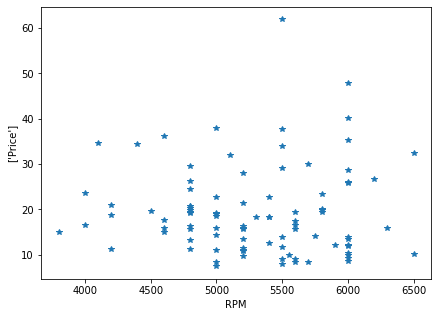

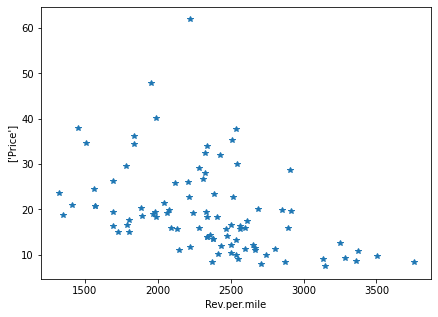

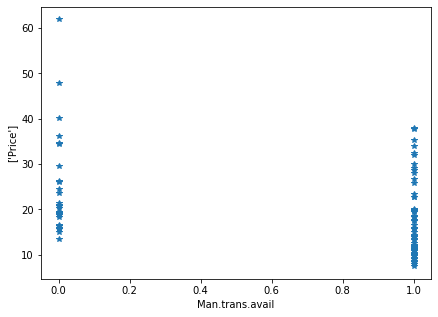

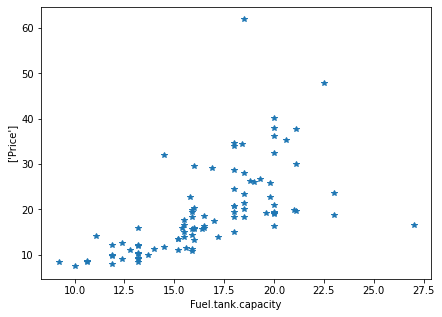

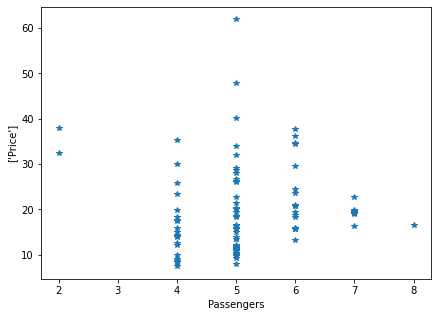

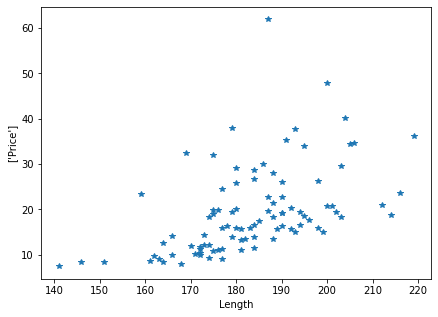

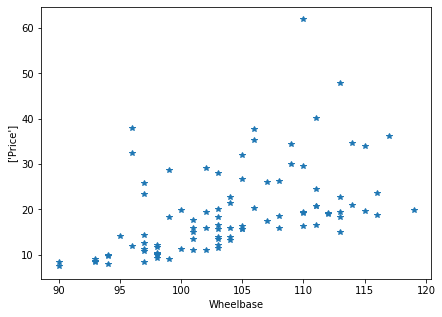

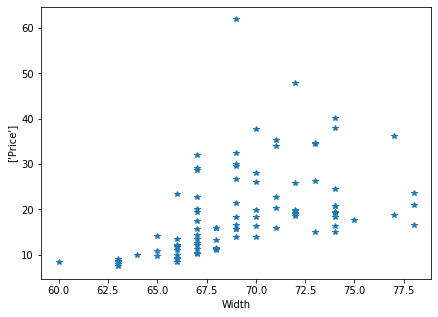

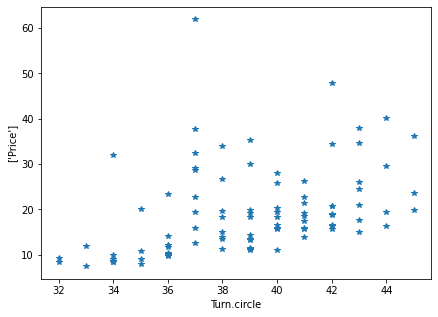

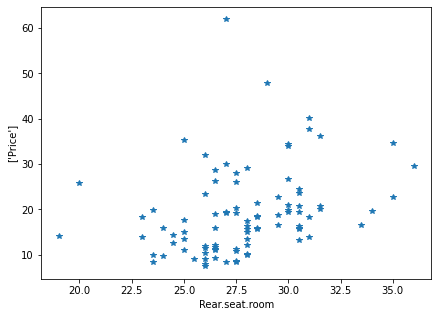

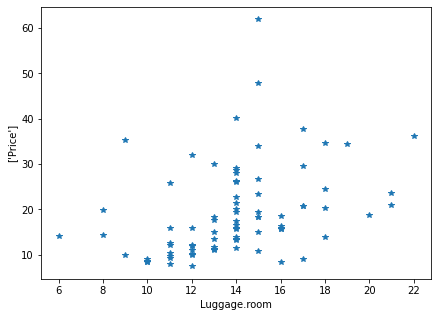

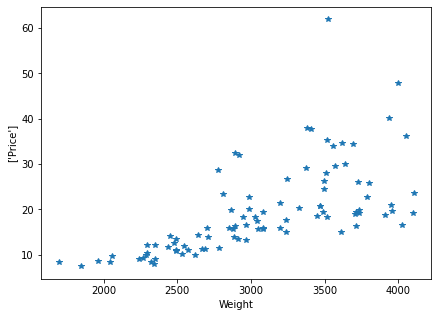

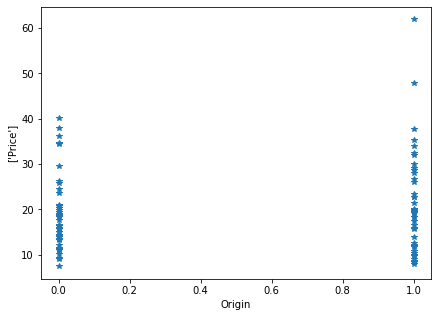

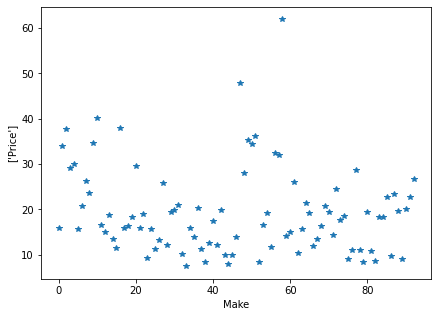

In [ ]:
for k in keys:
  fig = plt.figure(figsize=(7,5))
  plt.plot(data_copy[k],data_copy[y],'*')
  plt.xlabel(k)
  plt.ylabel(y)
  plt.show()

In [ ]:
data_copy.isnull().sum()

Unnamed: 0             0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

Vemos que existen dos columnas de datos que contienen datos nulos, sin embargo con el análisis visual observamos que no hay una correlación bien definida entre las columnas 'Rear.seat.room' y 'Luggage.room', por esta razón las descartamos en la siguiente linea.

In [ ]:
data_copy=data_copy.drop(['Rear.seat.room','Luggage.room'],axis=1)
data_copy.head()

In [ ]:
data_copy.head(30)

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Weight,Origin,Make
0,1,0,48,3,12.9,15.9,18.8,25,31,2,1,1,1.8,140,6300,2890,1,13.2,5,177,102,68,37,2705,1,0
1,2,0,55,2,29.2,33.9,38.7,18,25,0,1,3,3.2,200,5500,2335,1,18.0,5,195,115,71,38,3560,1,1
2,3,1,8,0,25.9,29.1,32.3,20,26,1,1,3,2.8,172,5500,2280,1,16.9,5,180,102,67,37,3375,1,3
3,4,1,0,2,30.8,37.7,44.6,19,26,0,1,3,2.8,172,5500,2535,1,21.1,6,193,106,70,37,3405,1,2
4,5,2,5,2,23.7,30.0,36.2,22,30,1,2,1,3.5,208,5700,2545,1,21.1,4,186,109,69,39,3640,1,4
5,6,3,23,2,14.2,15.7,17.3,22,31,1,1,1,2.2,110,5200,2565,0,16.4,6,189,105,69,41,2880,0,5
6,7,3,53,1,19.9,20.8,21.7,19,28,1,1,3,3.8,170,4800,1570,0,18.0,6,200,111,74,42,3470,0,6
7,8,3,73,1,22.6,23.7,24.9,16,25,1,2,3,5.7,180,4000,1320,0,23.0,6,216,116,78,45,4105,0,8
8,9,3,72,2,26.3,26.3,26.3,19,27,1,1,3,3.8,170,4800,1690,0,18.8,5,198,108,73,41,3495,0,7
9,10,4,34,1,33.0,34.7,36.3,16,25,1,1,4,4.9,200,4100,1510,0,18.0,6,206,114,73,43,3620,0,9


In [ ]:
!pip install corner

In [ ]:
data_copy.columns

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Weight', 'Origin', 'Make'],
      dtype='object')

In [ ]:
keys=['Manufacturer', 'Model', 'Type', 'Min.Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Weight', 'Origin', 'Make']

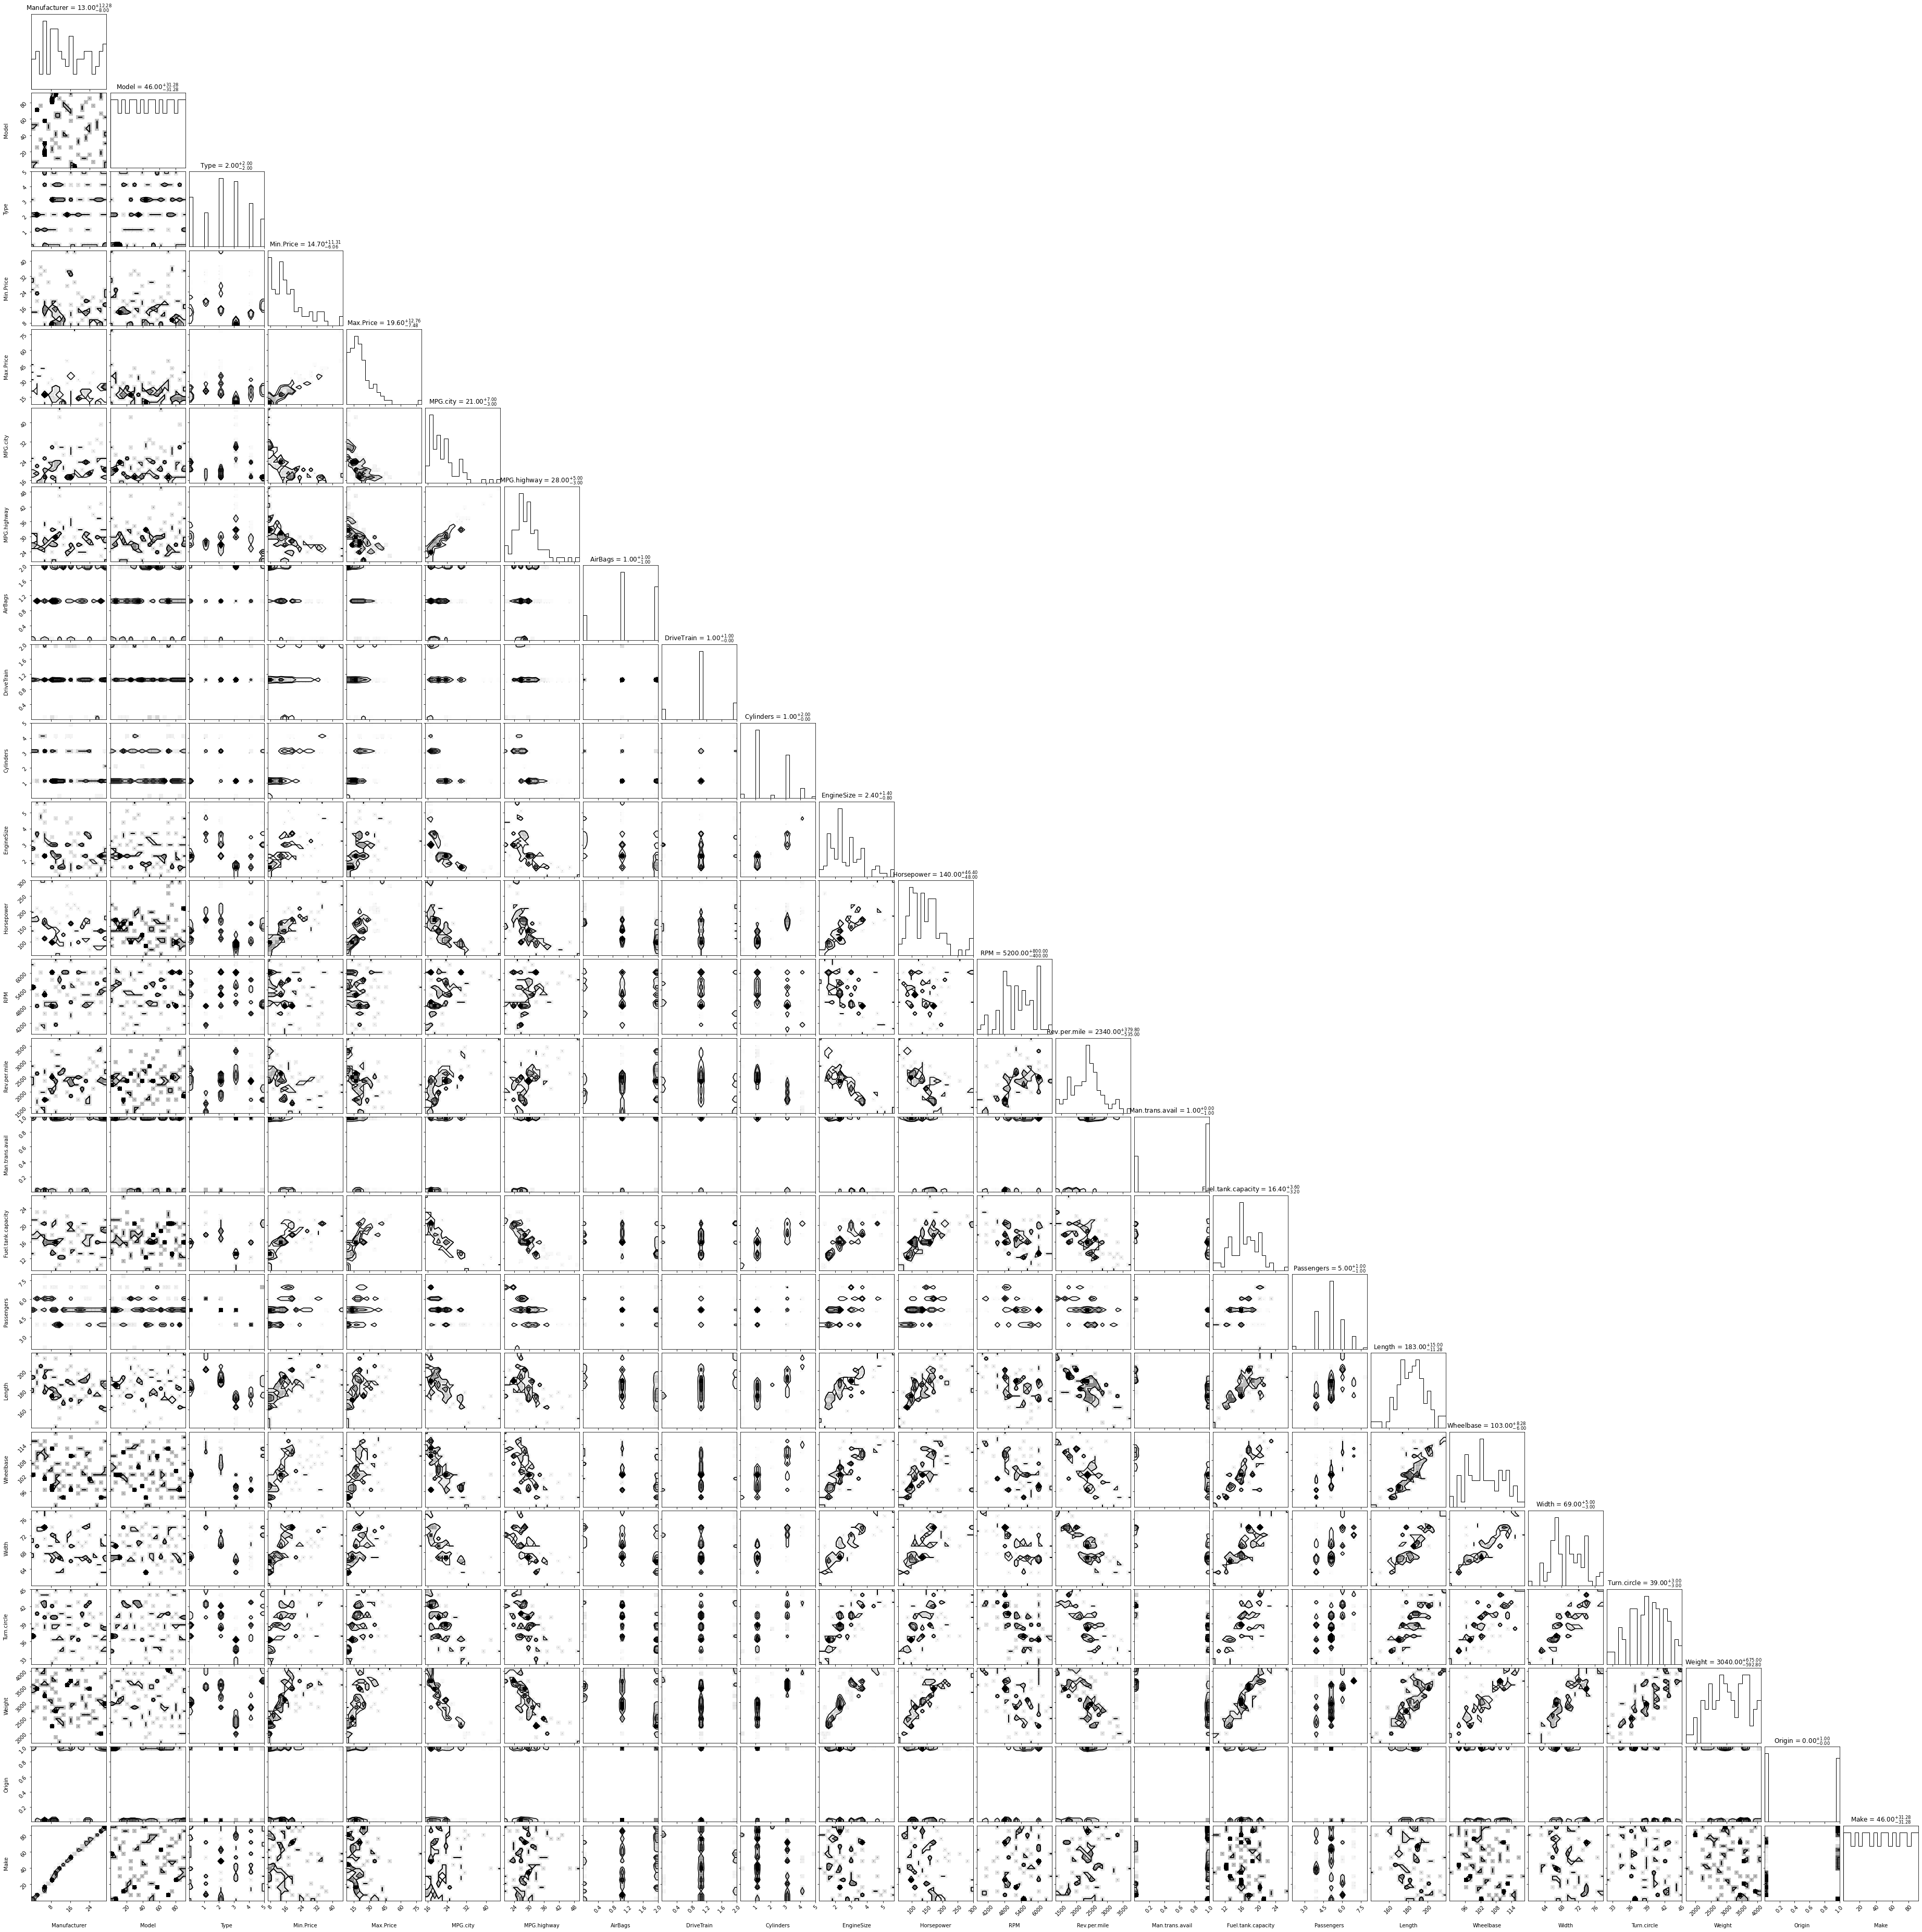

In [ ]:
import corner

figure = corner.corner(data_copy[keys], 
                       labels=keys,
                       #quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})

##Selección de un primer conjunto de datos

Teniendo en cuenta las anteriores gráficas podemos deducir que la grán mayoría de los datos están correlacionados, por lo tanto un conjunto adecuado de datos no correlacionados sería: Model, HorsePower, Type, DriveTrain, Manufacturer, Origin.

##Escalamiento de datos

In [ ]:
from sklearn.preprocessing import StandardScaler

fkeys=['Model', 'Horsepower', 'Type', 'DriveTrain', 'Manufacturer', 'Origin']
data_scaled = StandardScaler().fit_transform(data_copy[fkeys])

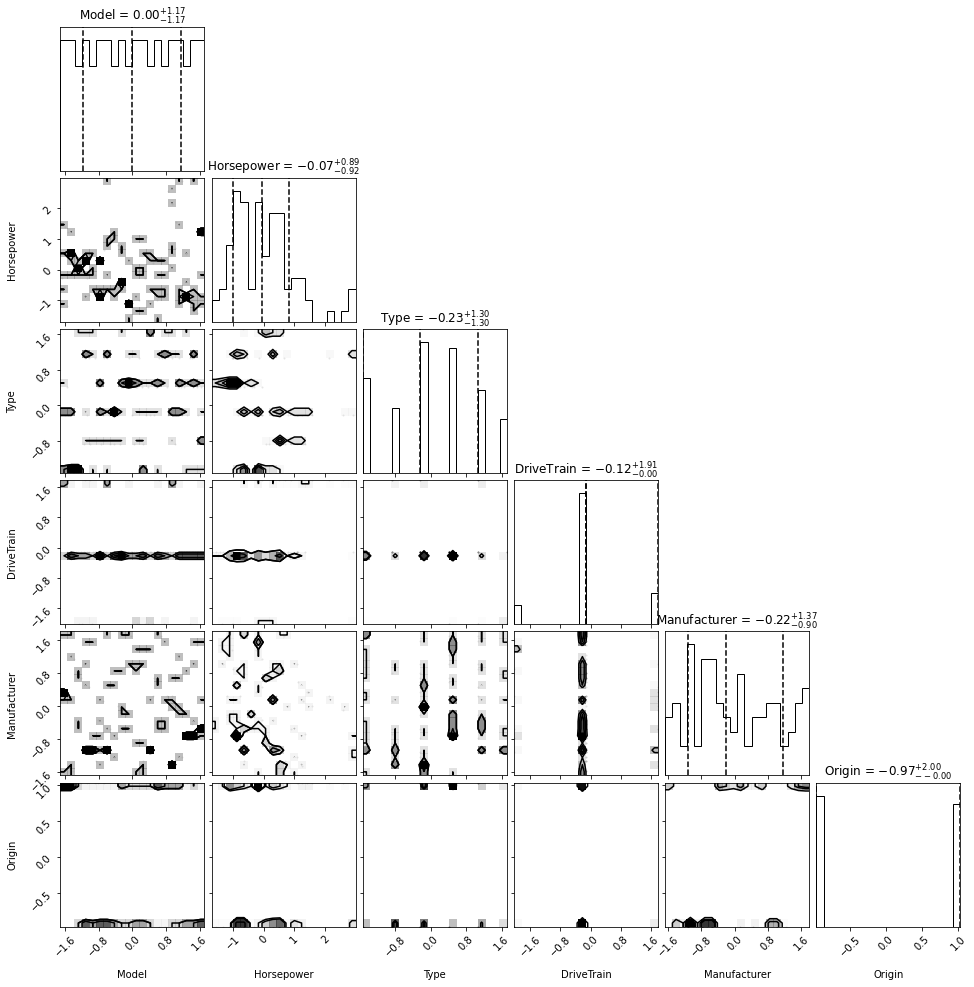

In [ ]:
figure = corner.corner(data_scaled, labels=fkeys,
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})

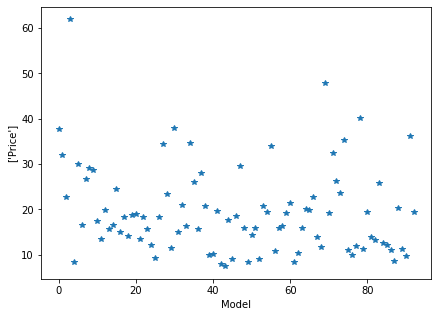

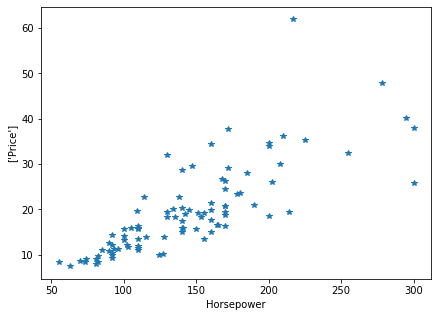

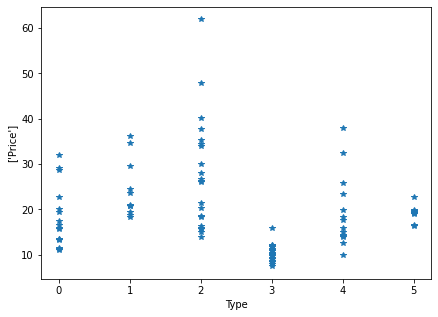

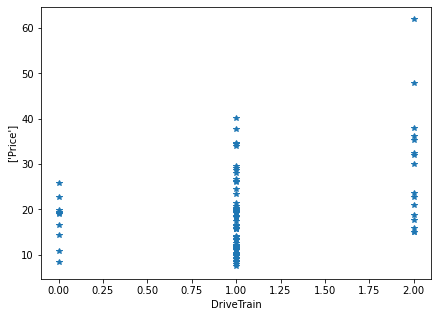

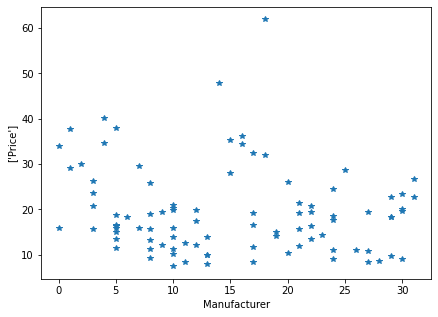

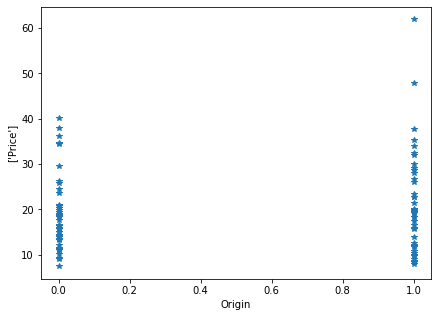

In [ ]:
#--- Clasificación Visual
for k in fkeys:
  fig = plt.figure(figsize=(7,5))
  plt.plot(data_copy[k],data[y],'*')
  plt.xlabel(k)
  plt.ylabel(y)
  plt.show()

##Hipotesis

De acuerdo con las anteriores, se establece la hipotesis de que las variables mas importantes para determinar el precio de un carro son 'Horsepower' y 'DriveTrain'

##Evaluación de la hipotesis

In [ ]:
#--- Cargamos el método para crear un modelo de Bosque Aleatorio

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
data_copy[fkeys].head()

,Model,Horsepower,Type,DriveTrain,Manufacturer,Origin
0,48,140,3,1,0,1
1,55,200,2,1,0,1
2,8,172,0,1,1,1
3,0,172,2,1,1,1
4,5,208,2,2,2,1


In [ ]:
#--- Importamos algunos métodos de sklearn

from sklearn.model_selection import train_test_split

model = RandomForestClassifier(n_estimators=100, max_depth=10)

X_train, X_test, Y_train, Y_test = train_test_split(np.array(data_copy[keys]),Y)

model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)
#np.shape(data_scaled), np.shape(X_train), np.shape(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


##NO PUDE RESOLVER EL PROBLEMA DE LA CELDA ANTERIOR!!

In [ ]:
#--- Calculamos la precisión
acc = sum(Y_pred == Y_test)/len(Y_test)
acc

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [ ]:
#--- Calculamos la importancia de los parámetros
importances = model.feature_importances_
importances

array([0., 0., 0., 0., 0., 0.])

In [ ]:
#--- Organizamos los parametros de menor a mayor
ii = np.argsort(importances)[::-1]
np.array(keys)[ii]

array(['MPG.city', 'Max.Price', 'Min.Price', 'Type', 'Model',
       'Manufacturer'], dtype='<U18')